In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

In [17]:
raw_df = pd.read_csv('stats.csv')

In [18]:
df = raw_df.copy()
df.drop('last_name, first_name',axis = 1,inplace=True)
df.drop('player_id',axis = 1,inplace=True)

In [19]:
train_df = df[(df['year'] == 2021) | (df['year'] == 2020)]
val_df = df[df.year==2022]
test_df = df[df.year==2023]

## Linear Regression Training / Validation 
#### all features

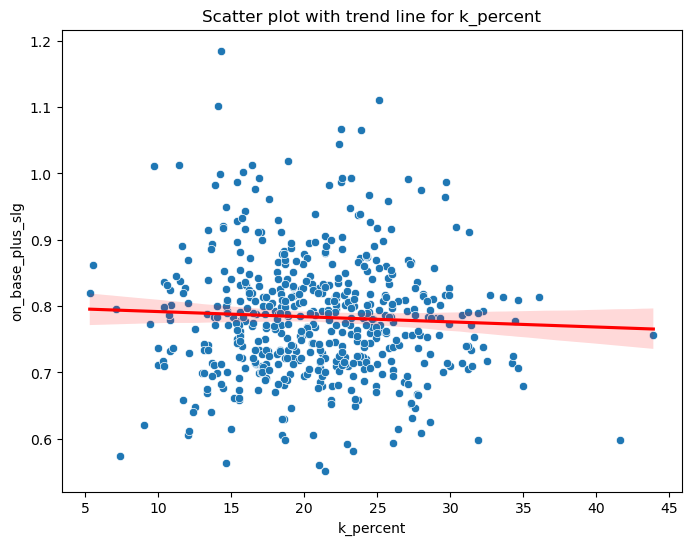

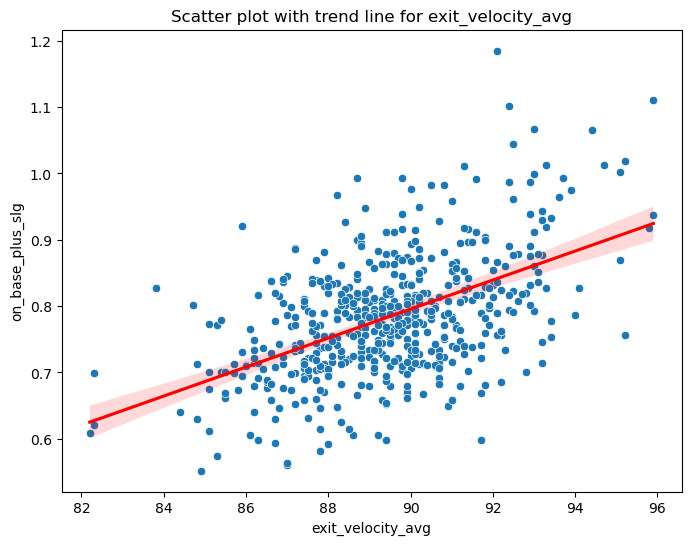

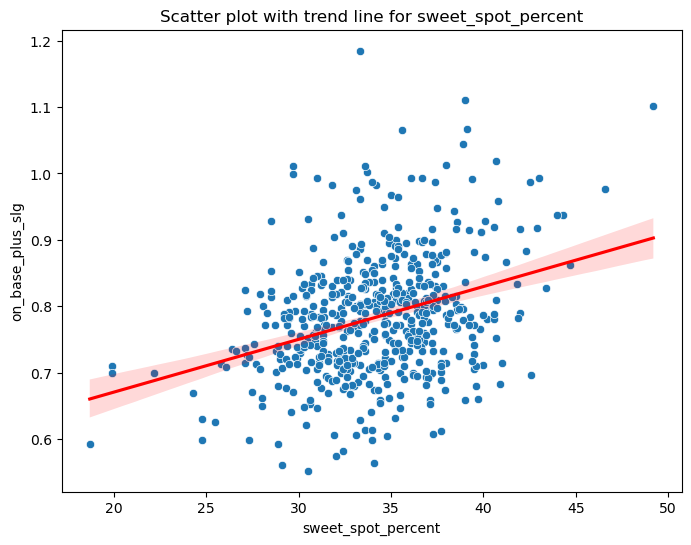

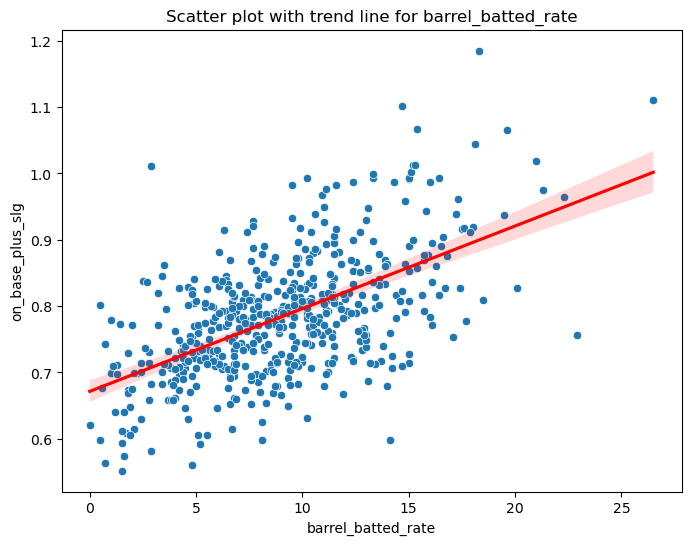

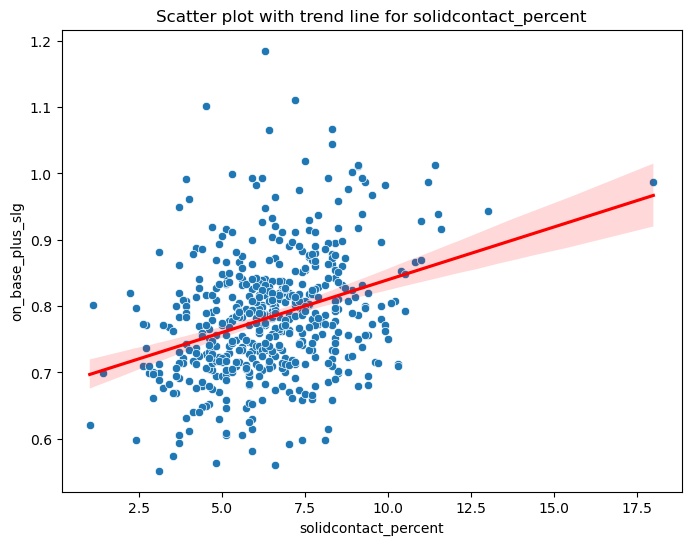

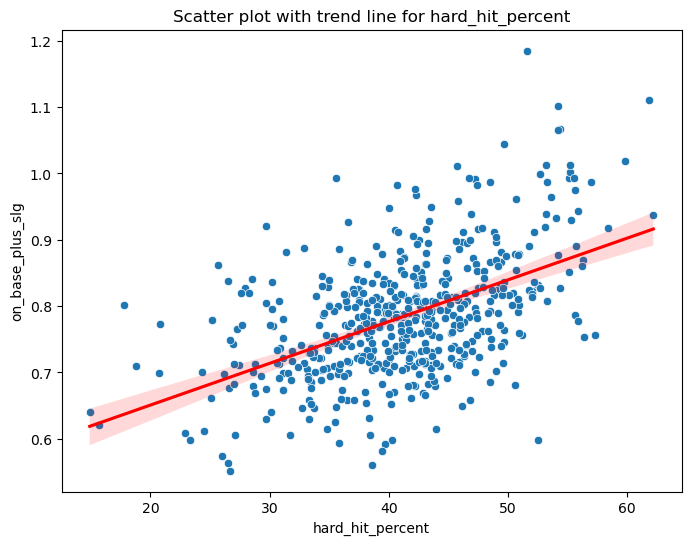

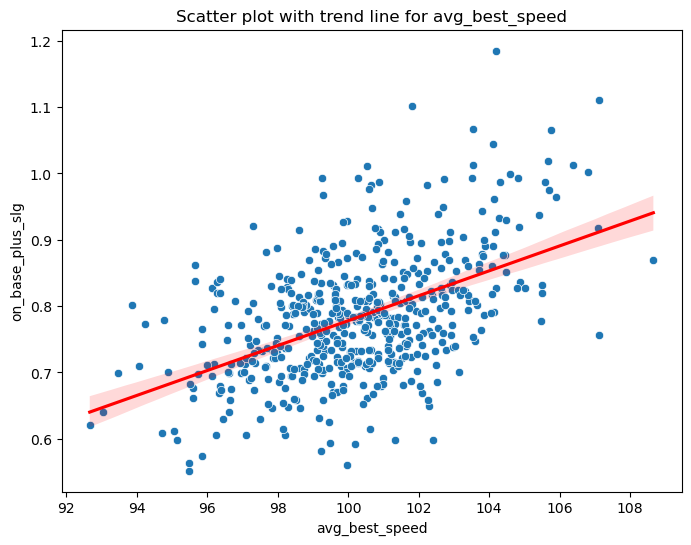

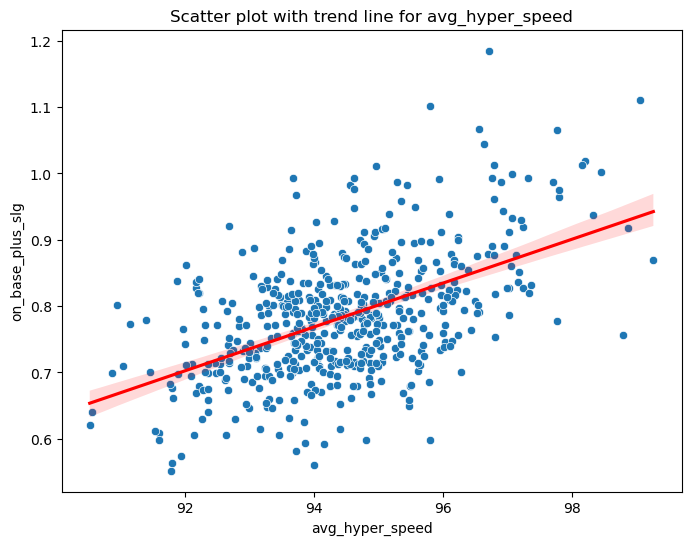

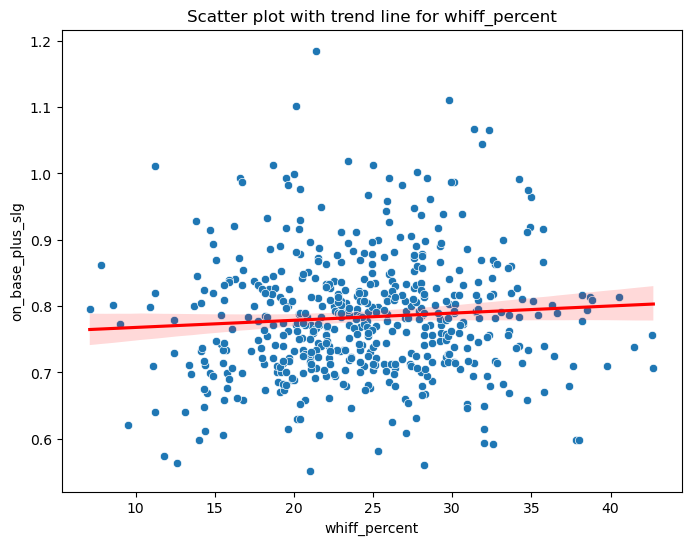

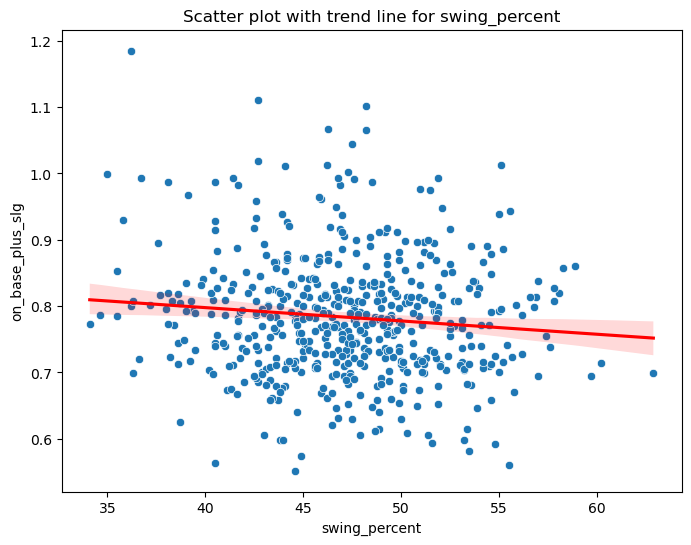

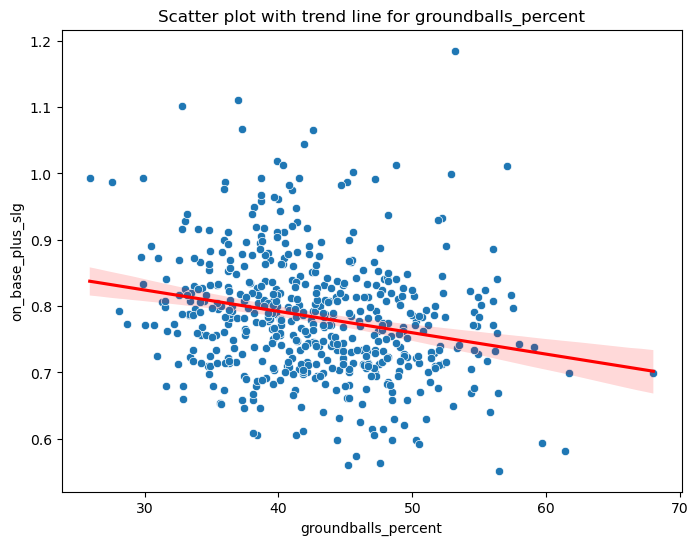

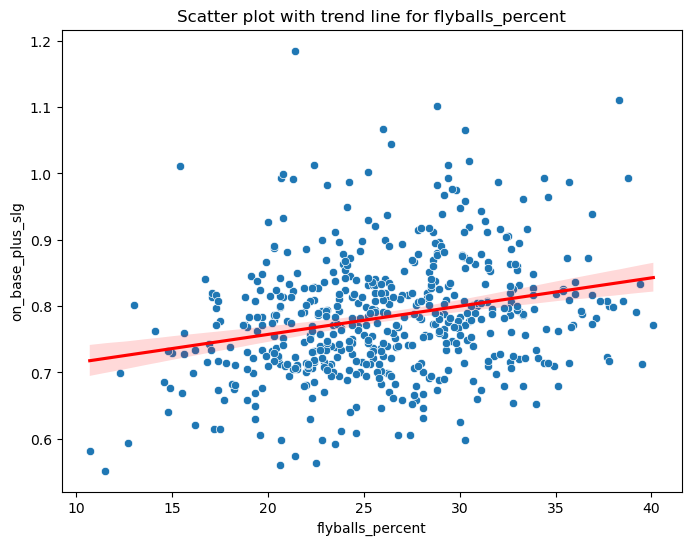

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['k_percent', 'exit_velocity_avg', 'sweet_spot_percent', 'barrel_batted_rate', 'solidcontact_percent', 'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed', 'whiff_percent', 'swing_percent', 'groundballs_percent', 'flyballs_percent']
y = raw_df['on_base_plus_slg']  # Assuming 'on_base_plus_slg' is the target variable

for feature in features:
    X = raw_df[feature]  # Access the feature column using the loop variable
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.scatterplot(x=X, y=y)
    sns.regplot(x=X, y=y, scatter=False, color='red')
    plt.xlabel(feature)  # Set x-axis label to the current feature
    plt.ylabel('on_base_plus_slg')  # Set y-axis label to the target variable
    plt.title(f'Scatter plot with trend line for {feature}')  # Set plot title
    plt.savefig(f'{feature}_scatter_plot.png')  # Save the figure as a PNG file
    plt.show()

In [21]:
####TRAINING
features = ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 
          'avg_best_speed','avg_hyper_speed',
          'whiff_percent', 'swing_percent',
          'groundballs_percent', 'flyballs_percent']

X_train = train_df[features]
y_train = train_df['on_base_plus_slg']

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train) # do scaling
# X_train_scaled

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
b = model.intercept_
w = model.coef_[0]
print(f'TRAINING:::intercept={b:.3}, slope={w:.3}')
print(f'Accuracy on Training Data R^2= {model.score(X_train,y_train):.3}')

MAE_train = mean_absolute_error(y_train,model.predict(X_train))
MSE_train = mean_squared_error(y_train,model.predict(X_train))
RMSE_train = np.sqrt(MSE_train)

print("MAE_train: %f" % (MAE_train))
print("RMSE_train: %f" % (RMSE_train))
print(f'The accuracy on the trainning data is: {model.score(X_train,y_train):.3}.')

TRAINING:::intercept=2.08, slope=-0.00812
Accuracy on Training Data R^2= 0.637
MAE_train: 0.046586
RMSE_train: 0.058858
The accuracy on the trainning data is: 0.637.


In [22]:
####VALIDATION
X_val = val_df[features]
y_val = val_df['on_base_plus_slg']
#X_val = scaler.transform(X_val)

validation_predictions = model.predict(X_val)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)
print(f'Accuracy on Validation Data R^2= {model.score(X_val,y_val):.3}')

print("MAE_val: %f" % (MAE_val))
print("RMSE_val: %f" % (RMSE_val))

Accuracy on Validation Data R^2= 0.417
MAE_val: 0.052186
RMSE_val: 0.063538


## PERMUTATION FEATURE IMPORTANCE ON LINEAR REGRESSION MODEL
##### THERE ARE MANY FEATURES AND ALL OF THEM HAVE VERY SMALL WEIGHTS (COEF VALUES) SO I AM GOING TO PERFORM PERMUTATION IMPORTANCE
##### PERMUTATION IMPORTANCE::::evalutates the contributions of each feature to a fitted model 

pi.importances_mean=[ 8.92101028e-01  2.19058256e-01  2.43137437e-02  8.73153966e-01
  3.26048607e-03 -4.36951074e-04  1.82688982e-01  1.40563876e+00
  1.10765476e-02  9.40416832e-03 -8.84653607e-05  1.07400958e-03]
pi.importances_std=[0.0644649  0.03722087 0.01251087 0.13676049 0.00697517 0.0013596
 0.02536638 0.20986081 0.00507362 0.00793397 0.00138556 0.00317549]
pi.importances=[[ 9.40755858e-01  8.71662761e-01  7.74019524e-01  9.39533960e-01
   9.34533038e-01]
 [ 1.71931716e-01  2.39221740e-01  1.77317600e-01  2.63337500e-01
   2.43482724e-01]
 [ 3.15761014e-02  4.04013019e-02  2.08856979e-02  2.57735276e-02
   2.93208946e-03]
 [ 9.68023954e-01  9.56627447e-01  1.01641397e+00  7.63884757e-01
   6.60819708e-01]
 [ 1.08082891e-02  3.35848151e-03  1.05609953e-02 -7.47552796e-03
  -9.49807572e-04]
 [ 4.81956952e-04 -1.31416558e-03  1.80228122e-03 -1.65851223e-03
  -1.49631572e-03]
 [ 1.60469543e-01  2.12388536e-01  1.45611478e-01  1.93695872e-01
   2.01279481e-01]
 [ 1.49747965e+00  1.

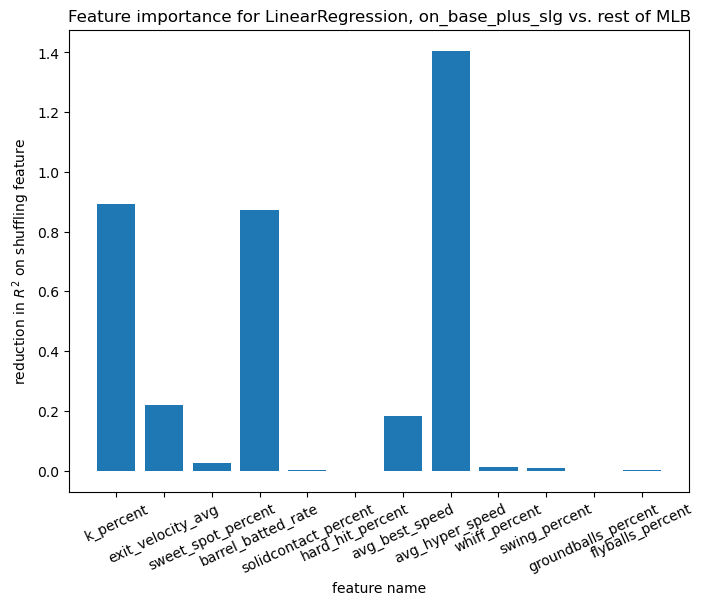

In [24]:

X_feat_importance = val_df[features]
y_feat_importance = val_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_feat_importance, y_feat_importance)
pi = permutation_importancedd(estimator=model, X=X_feat_importance, y=y_feat_importance, random_state=0)
print(f'pi.importances_mean={pi.importances_mean}')
print(f'pi.importances_std={pi.importances_std}')
print(f'pi.importances={pi.importances}')
plt.figure(figsize=(8, 6))
plt.bar(x=range(X_feat_importance.columns.size), height=pi.importances_mean, tick_label=X_feat_importance.columns)
plt.title('Feature importance for LinearRegression, on_base_plus_slg vs. rest of MLB')
plt.xlabel('feature name')
plt.xticks(rotation=25)
plt.savefig(f'Feature importance for LinearRegression, on_base_plus_slg vs. rest of MLB.png')
_ = plt.ylabel(r'reduction in $R^2$ on shuffling feature')

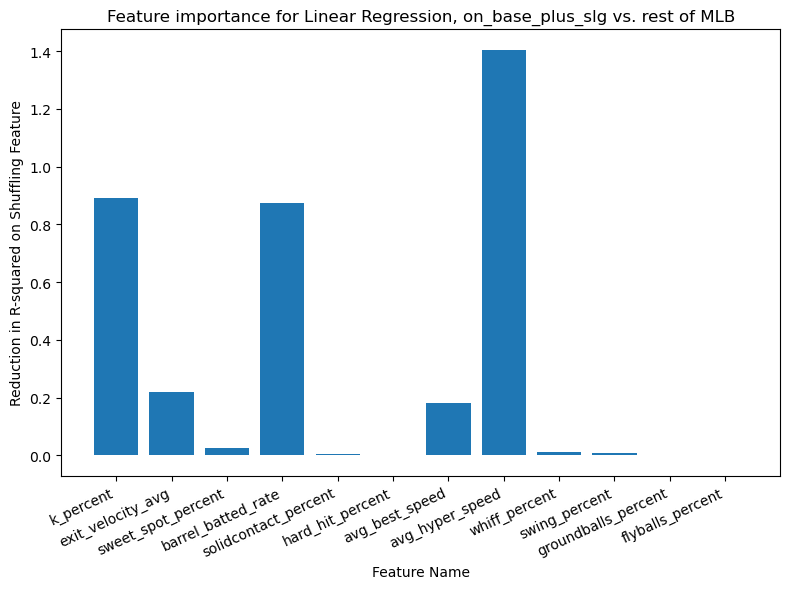

In [64]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.inspection import permutation_importance

X_feat_importance = val_df[features]
y_feat_importance = val_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_feat_importance, y_feat_importance)
pi = permutation_importance(estimator=model, X=X_feat_importance, y=y_feat_importance, random_state=0)

plt.figure(figsize=(8, 6))
plt.bar(x=range(X_feat_importance.columns.size), height=pi.importances_mean, tick_label=X_feat_importance.columns)
plt.title('Feature importance for Linear Regression, on_base_plus_slg vs. rest of MLB')
plt.xlabel('Feature Name')
plt.ylabel('Reduction in R-squared on Shuffling Feature')
plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.savefig('Feature_importance_LinearRegression_on_base_plus_slg_vs_rest_of_MLB.png')
plt.show()


### ANALYZING SUBSETS OF THE MOST IMPORTANT FEATURES


#### 1) features: k_percent, exit_velocity_avg, sweet_spot_percent, barrel_batted_rate, avg_hyper_speed, avg_best_speed

In [53]:
features = ['k_percent','exit_velocity_avg','sweet_spot_percent','barrel_batted_rate','avg_hyper_speed','avg_best_speed']
X_train = train_df[features]
y_train = train_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
MAE_train = mean_absolute_error(y_train,model.predict(X_train))
MSE_train = mean_squared_error(y_train,model.predict(X_train))
RMSE_train = np.sqrt(MAE_train)

print("MAE_train: %f" % (MAE_train))
print("RMSE_train: %f" % (RMSE_train))
print(f'The accuracy on the validation data is: {model.score(X_train,y_train):.3}.')
print(f'The accuracy on the training data is = {model.score(X_train,y_train):.3}.')

X_val = val_df[features]
y_val = val_df['on_base_plus_slg']
validation_predictions = model.predict(X_val)
MAE_val = mean_absolute_error(y_val,validation_predictions)
MSE_val = mean_squared_error(y_val,validation_predictions)
RMSE_val = np.sqrt(MSE_val)

print("MAE_val: %f" % (MAE_val))
print("RMSE_val: %f" % (RMSE_val))
print(f'The accuracy on the validation data is: {model.score(X_val,y_val):.3}.')

MAE_train: 0.047707
RMSE_train: 0.218420
The accuracy on the validation data is: 0.609.
The accuracy on the training data is = 0.609.
MAE_val: 0.054388
RMSE_val: 0.065918
The accuracy on the validation data is: 0.373.


In [52]:
# features = ['k_percent','exit_velocity_avg','barrel_batted_rate','avg_hyper_speed','avg_best_speed']
# X_train = train_df[features]
# y_train = train_df['on_base_plus_slg']
# model = linear_model.LinearRegression()
# model.fit(X_train,y_train)
# MAE_train = mean_absolute_error(y_train,model.predict(X_train))
# MSE_train = mean_squared_error(y_train,model.predict(X_train))
# RMSE_train = np.sqrt(MAE_train)

# print("MAE_train: %f" % (MAE_val))
# print("RMSE_train: %f" % (RMSE_val))
# print(f'The accuracy on the validation data is: {model.score(X_train,y_train):.3}.')
# print(f'The accuracy on the training data is = {model.score(X_train,y_train):.3}.')

# print(f'The accuracy on the training data is = {model.score(X_train,y_train):.3}.')

# X_val = val_df[features]
# y_val = val_df['on_base_plus_slg']
# validation_predictions = model.predict(X_val)
# MAE_val = mean_absolute_error(y_val,validation_predictions)
# MSE_val = mean_squared_error(y_val,validation_predictions)
# RMSE_val = np.sqrt(MSE_val)

# print("MAE_val: %f" % (MAE_val))
# print("RMSE_val: %f" % (RMSE_val))
# print(f'The accuracy on the validation data is: {model.score(X_val,y_val):.3}.')

## Testing Linear Regression on the 2023 Data


In [66]:
features = ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 
          'avg_best_speed','avg_hyper_speed',
          'whiff_percent', 'swing_percent',
          'groundballs_percent', 'flyballs_percent']

X_train = train_df[features]
y_train = train_df['on_base_plus_slg']
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

X_test = test_df[features]
y_test = test_df['on_base_plus_slg']



test_predictions = model.predict(X_test)

ops_diff_std = test_predictions - y_test
print(ops_diff_std.std())
MAE_test = mean_absolute_error(test_predictions, y_test)
MSE_test = mean_squared_error(y_test, test_predictions)
RMSE_test = np.sqrt(MSE_test)

print(f'MAE on Test Data: {MAE_test:.3}')
print(f'MSE on Test Data: {MSE_test:.3}')
print(f'RMSE on Test Data: {RMSE_test:.3}')

0.04933304142525788
MAE on Test Data: 0.0422
MSE on Test Data: 0.00275
RMSE on Test Data: 0.0524


In [69]:
# ops_diff_std[1:5].std

In [67]:
ops_diff_std[1:5].std

<bound method Series.std of 405    0.023161
406    0.046487
407   -0.038382
408    0.041171
Name: on_base_plus_slg, dtype: float64>

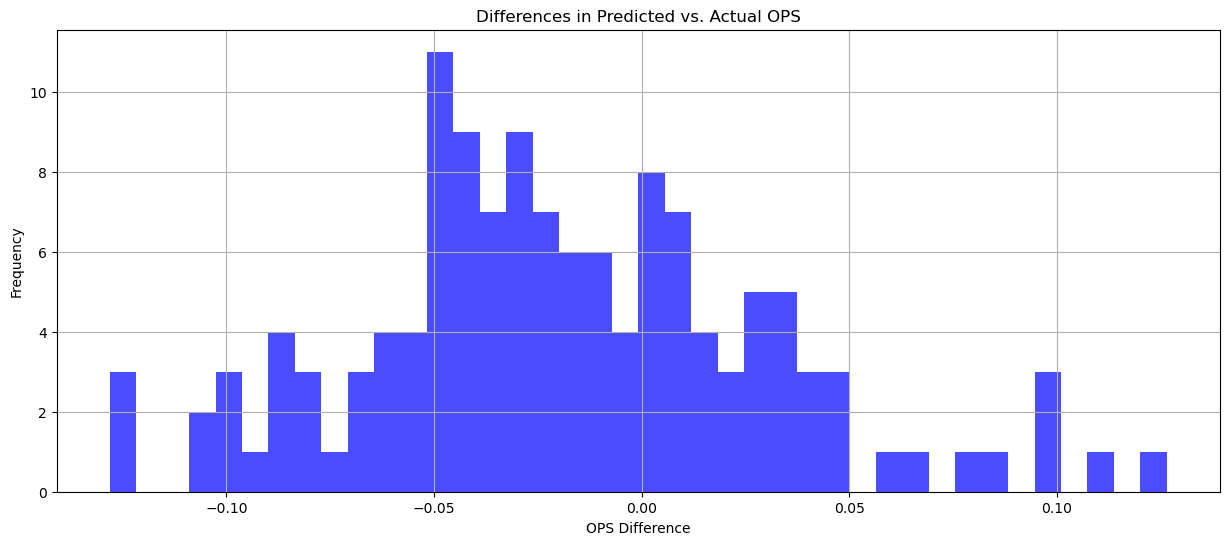

In [80]:
differences = y_test - test_predictions

plt.figure(figsize=(15, 6))
plt.hist(differences, bins=40, alpha=0.7, color='blue')
plt.title('Differences in Predicted vs. Actual OPS')
plt.xlabel('OPS Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('Differences in Predicted vs. Actual OPS.png')
plt.show()

## Comparing our linear Regression on Existing 2023 BATX Prediction Model

In [79]:
df = pd.read_csv('stats.csv')
batx_df = pd.read_csv('fangraphs-leaderboard-projections-batX.csv')

raw_df = pd.read_csv('stats.csv')
test_df = raw_df[raw_df.year==2023]
def clean_and_rearrange_names(name):
    parts = name.split(',')
    if len(parts) == 2:
        return parts[1].strip() + ' ' + parts[0].strip()
    else:
        return name

test_df['Name'] = test_df['last_name, first_name'].apply(clean_and_rearrange_names)

merged_df = pd.merge(test_df, batx_df, left_on='Name', right_on='Name', suffixes=('_model', '_batx'))


In [ ]:
##Comparing BATX to actual outcomes. 

merged_df['OPS_Difference'] = merged_df['OPS'] - merged_df['on_base_plus_slg']
                                                          
plt.figure(figsize=(10, 6))
plt.hist(merged_df['OPS_Difference'], bins=40, alpha=0.7, color='blue')
plt.title('Difference in OPS: Model vs. BatX')
plt.xlabel('OPS Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and print statistical measures
ops_diff_std = merged_df['OPS_Difference'].std()
mean_ops_difference = merged_df['OPS_Difference'].mean()
print(f"STD of OPS_Difference: {ops_diff_std:.3f}")
print(f"Mean of OPS_Difference: {mean_ops_difference:.3f}")